# Airline Customer Satisfaction

### Travis Lloyd, Isabella Oakes, Lina Nguyen 

### ADS 505: Applied Data Science for Business

### Shiley-Marcos School of Engineering, University of San Diego


### Problem Statement

Flight satisfaction is one of the most important factors in having a successful airline that customers will happily return to. Using an flight satisfaction survey, 18 features will be used to create models that determine if a customer is satisfied or unsatisfied with their flight. Using information gathered from the model, it will be determined which customers will be satisfied with the service provided as well as what features contribute most heavily when determining if customers are satisfied or not.

***
### Table of Contents<br>
>[Exploratory Data Analysis](#eda)<br>
>[Data PreProcessing](#preproc)<br>
>[Data Splitting](#splitting)<br>
>[Model Building & Performance](#models)<br>
>[Results](#results)<br>
>[Conclusion](#conclusion)

<a id="eda"></a>
### Exploratory Data Analysis

In [1]:
#importing packages
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# import models
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import AdaBoostClassifier

from dmba import classificationSummary, gainsChart

from matplotlib.lines import Line2D

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
DATA = Path('.').resolve().parent / 'data'

In [2]:
#importing training and testing data 
df = pd.read_csv('Desktop/train.csv')
dftest = pd.read_csv('Desktop/test.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
dftest.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [4]:
#view columns of training data
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [5]:
#view data distribution of each column in training data
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [6]:
#view columns of test data
dftest.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [7]:
#view data distribution of each column in test data
dftest.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


<a id="preproc"></a>
<br>
### Data Preprocessing

#### Using the describe method we will take initial steps in our Data Exploration. We will be looking for variables that need normalization along with their distributions.

**The next step in the preparation of the data is to give the variables reusable names, eliminating spaces and capitol letters. This will help with the probability of typing errors while scripting. After changing the labels, we will check the nunique values to check for variable with high amounts of unique variables, typically indicating columns that need to be binned**

In [82]:
#renaming training data columns
df = df.rename(columns={'Customer Type':'customer_type',
                   'Type of Travel':'travel_type',
                   'Flight Distance':'flight_dist',
                   'Inflight wifi service':'wifi_service',
                   'Departure/Arrival time convenient':'time_convenience',
                   'Ease of Online booking':'booking_diff',
                   'Gate location':'gate_loc',
                   'Food and drink':'food_drink',
                   'Online boarding':'online_boarding', 
                   'Seat comfort':'seat_comf',
                   'Inflight entertainment':'inflight_ent', 
                   'On-board service':'onboard_serv', 
                   'Leg room service':'legroom',
                   'Baggage handling':'baggage_care', 
                   'Checkin service':'checkin',
                   'Inflight service':'inflight_serv',
                   'Departure Delay in Minutes':'dept_delay', 
                   'Arrival Delay in Minutes':'arr_delay'
                  })

In [9]:
#renaming testing data columns
dftest = dftest.rename(columns={'Customer Type':'customer_type',
                   'Type of Travel':'travel_type',
                   'Flight Distance':'flight_dist',
                   'Inflight wifi service':'wifi_service',
                   'Departure/Arrival time convenient':'time_convenience',
                   'Ease of Online booking':'booking_diff',
                   'Gate location':'gate_loc',
                   'Food and drink':'food_drink',
                   'Online boarding':'online_boarding', 
                   'Seat comfort':'seat_comf',
                   'Inflight entertainment':'inflight_ent', 
                   'On-board service':'onboard_serv', 
                   'Leg room service':'legroom',
                   'Baggage handling':'baggage_care', 
                   'Checkin service':'checkin',
                   'Inflight service':'inflight_serv',
                   'Departure Delay in Minutes':'dept_delay', 
                   'Arrival Delay in Minutes':'arr_delay'
                  })

In [10]:
# Number of unique values for training
for column in df.columns:
    print(column, df[column].nunique())

Unnamed: 0 103904
id 103904
Gender 2
customer_type 2
Age 75
travel_type 2
Class 3
flight_dist 3802
wifi_service 6
time_convenience 6
booking_diff 6
gate_loc 6
food_drink 6
online_boarding 6
seat_comf 6
inflight_ent 6
onboard_serv 6
legroom 6
baggage_care 5
checkin 6
inflight_serv 6
Cleanliness 6
dept_delay 446
arr_delay 455
satisfaction 2


In [11]:
# Number of unique values for testing
for column in dftest.columns:
    print(column, dftest[column].nunique())

Unnamed: 0 25976
id 25976
Gender 2
customer_type 2
Age 75
travel_type 2
Class 3
flight_dist 3281
wifi_service 6
time_convenience 6
booking_diff 6
gate_loc 5
food_drink 6
online_boarding 6
seat_comf 5
inflight_ent 6
onboard_serv 6
legroom 6
baggage_care 5
checkin 5
inflight_serv 6
Cleanliness 6
dept_delay 313
arr_delay 320
satisfaction 2


**Using helper functions, we can access reusable code that we will use later for model metrics.The stat_print function will print each of the more usable metrics, allowing us to evaluate all models performances with one line of code. After the helper functions, checking for null values in both datasets will prevent errors while parsing data.**

In [12]:
# Helper Functions

classes = ('Satisfied', 'Unsatisfied')

def check_na(df):
    if df.isna().sum().sum():
        print ('Missing values detected')
    else:
        print('No Missing Values Detected')

#Function for printing model evaluation metrics
def stat_print(train_y, pred_cancel):
    print('Recall Score    : ',recall_score(train_y, pred_cancel, average='weighted'))
    print('Accuracy Score  : ',accuracy_score(train_y, pred_cancel))
    print('F1 Score        : ',f1_score(train_y,pred_cancel))
    print('Precision Score : ',precision_score(train_y,pred_cancel))
    
    
def confusionMatrices(model, title):
    print(title + ' - training results')
    classificationSummary(train_y, model.predict(train_X), class_names=classes)
    print(title + ' - validation results')
    valid_pred = model.predict(valid_X)
    classificationSummary(valid_y, valid_pred, class_names=classes)

In [13]:
#view na for test data
check_na(dftest)

Missing values detected


In [14]:
#view na for train data
check_na(df)

Missing values detected


In [15]:
# Checking for na values
df.isna().sum()

Unnamed: 0            0
id                    0
Gender                0
customer_type         0
Age                   0
travel_type           0
Class                 0
flight_dist           0
wifi_service          0
time_convenience      0
booking_diff          0
gate_loc              0
food_drink            0
online_boarding       0
seat_comf             0
inflight_ent          0
onboard_serv          0
legroom               0
baggage_care          0
checkin               0
inflight_serv         0
Cleanliness           0
dept_delay            0
arr_delay           310
satisfaction          0
dtype: int64

In [16]:
#view na for testing
dftest.isna().sum()

Unnamed: 0           0
id                   0
Gender               0
customer_type        0
Age                  0
travel_type          0
Class                0
flight_dist          0
wifi_service         0
time_convenience     0
booking_diff         0
gate_loc             0
food_drink           0
online_boarding      0
seat_comf            0
inflight_ent         0
onboard_serv         0
legroom              0
baggage_care         0
checkin              0
inflight_serv        0
Cleanliness          0
dept_delay           0
arr_delay           83
satisfaction         0
dtype: int64

In [17]:
#sorting values by 'dept_delay' in training
df.sort_values(by='dept_delay', ascending=False)

,Unnamed: 0,id,Gender,customer_type,Age,travel_type,Class,flight_dist,wifi_service,time_convenience,...,inflight_ent,onboard_serv,legroom,baggage_care,checkin,inflight_serv,Cleanliness,dept_delay,arr_delay,satisfaction
83741,83741,73471,Female,Loyal Customer,47,Personal Travel,Eco,1120,2,2,...,2,4,4,4,2,3,2,1592,1584.0,neutral or dissatisfied
6744,6744,69661,Male,Loyal Customer,32,Business travel,Business,2916,2,2,...,3,4,5,4,5,3,5,1305,1280.0,satisfied
61310,61310,4903,Male,Loyal Customer,49,Business travel,Business,1959,1,1,...,4,4,4,5,4,4,4,1017,1011.0,satisfied
72206,72206,78300,Male,Loyal Customer,30,Personal Travel,Eco,1598,1,4,...,5,3,4,4,1,4,1,978,970.0,neutral or dissatisfied
80182,80182,8345,Male,Loyal Customer,47,Business travel,Business,2187,4,5,...,5,4,5,5,4,4,4,933,920.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44435,44435,95245,Male,Loyal Customer,49,Personal Travel,Eco,189,3,1,...,1,1,3,3,4,4,1,0,0.0,neutral or dissatisfied
44434,44434,58151,Female,Loyal Customer,42,Business travel,Business,3239,5,5,...,4,4,5,4,5,4,4,0,34.0,satisfied
44432,44432,6253,Female,Loyal Customer,8,Personal Travel,Eco,413,2,5,...,5,2,3,4,4,2,5,0,0.0,neutral or dissatisfied
44431,44431,48424,Male,Loyal Customer,47,Business travel,Eco,819,4,2,...,5,1,5,4,5,1,5,0,0.0,satisfied


In [18]:
#sorting values for testing data in testing
dftest.sort_values(by = 'dept_delay', ascending = False)

,Unnamed: 0,id,Gender,customer_type,Age,travel_type,Class,flight_dist,wifi_service,time_convenience,...,inflight_ent,onboard_serv,legroom,baggage_care,checkin,inflight_serv,Cleanliness,dept_delay,arr_delay,satisfaction
17429,17429,73482,Male,Loyal Customer,8,Personal Travel,Eco,1144,2,5,...,4,4,3,5,1,3,1,1128,1115.0,neutral or dissatisfied
1655,1655,63689,Female,Loyal Customer,39,Business travel,Business,1696,1,4,...,2,1,3,3,1,1,1,951,940.0,neutral or dissatisfied
19000,19000,2247,Female,Loyal Customer,42,Business travel,Business,693,2,1,...,2,5,3,3,2,4,2,815,822.0,neutral or dissatisfied
10072,10072,6062,Female,Loyal Customer,45,Personal Travel,Eco,630,1,4,...,3,4,4,5,5,5,5,794,795.0,neutral or dissatisfied
21907,21907,90926,Female,Loyal Customer,24,Business travel,Business,2507,2,5,...,3,1,3,3,2,3,2,756,748.0,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11057,11057,31858,Female,Loyal Customer,35,Personal Travel,Eco,2640,2,1,...,5,4,3,2,3,3,5,0,0.0,neutral or dissatisfied
11055,11055,91300,Male,Loyal Customer,55,Business travel,Business,3219,4,4,...,4,4,4,4,5,4,5,0,0.0,satisfied
11048,11048,31996,Female,Loyal Customer,57,Personal Travel,Business,216,3,4,...,5,5,3,5,4,5,4,0,0.0,neutral or dissatisfied
11046,11046,29265,Female,Loyal Customer,27,Business travel,Eco,859,5,3,...,5,4,2,5,1,5,5,0,12.0,satisfied


**Filling in the missing values with relatively close values that match the pattern of arr_delay. The effect of filling in these missing values should be unnoticable as the total amount of records missing the values are insignificant in size.**

In [19]:
# Replacing arrival delay missing values based on the departing delay
df['arr_delay'].fillna(value=df['dept_delay'] -5,inplace=True)
dftest['arr_delay'].fillna(value=dftest['dept_delay'] -5,inplace=True)

**Taking the minimum and maximum values, we turned the flight distance variable into a categorical variable to pull more correlation out of the variable. This is the only feature creation we had to do within this dataset. After we bin we will check the correlation of variables using heatmaps and correlation tables.**

In [20]:
#finding min/max values of 'flight_dist' train
min_value = df['flight_dist'].min()
max_value = df['flight_dist'].max()
print(min_value)
print(max_value)

31
4983


In [21]:
#finding min/max values of 'flight_dist' test
min_valuetest = dftest['flight_dist'].min()
max_valuetest = dftest['flight_dist'].max()
print(min_valuetest)
print(max_valuetest)

31
4983


In [22]:
# Turning flight length into a binned variable
bins = np.linspace(min_value,max_value,4)
bins.round(2)
bins = np.linspace(min_value,max_value,4)
bins.round(2)

labels = ['short', 'medium', 'long']

In [23]:
# Turning flight length into a binned variable
bins = np.linspace(min_valuetest,max_valuetest,4)
bins.round(2)
bins = np.linspace(min_valuetest,max_valuetest,4)
bins.round(2)
dftest['flight_length'] = pd.cut(dftest['flight_dist'], bins=bins, labels=labels, include_lowest=True)

In [24]:
#create bins for histogram
df['flight_length'] = pd.cut(df['flight_dist'], bins=bins, labels=labels, include_lowest=True)

Text(0, 0.5, 'Frequency')

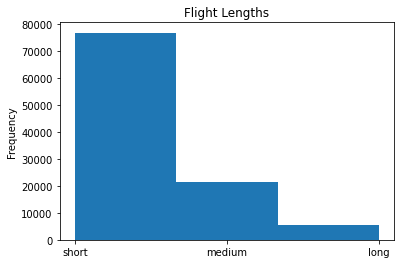

In [25]:
#creating histogram for Flight Lengths
plt.hist(df['flight_length'], bins=3)
plt.title('Flight Lengths')
plt.ylabel('Frequency')

**Here we are converting nominal data into categorical. This will also aid in correlation. After doing this, the original columns will be dropped from the dataset.**

In [26]:
## Creating dummy variable for Gender
# Male:0, Female:1
df.loc[df['Gender'] == 'Male', 'flight_dummy'] = 0
df.loc[df['Gender'] == 'Female', 'flight_dummy'] = 1

## Creating dummy variable for customer type
# disloyal:0, loyal:1
df.loc[df['customer_type'] == 'Loyal Customer', 'flight_dummy'] = 1
df.loc[df['customer_type'] == 'disloyal Customer', 'flight_dummy'] = 0

## Creating dummy variable for travel type
# personal:0, business:1
df.loc[df['travel_type'] == 'Business travel', 'flight_dummy'] = 1
df.loc[df['travel_type'] == 'Personal Travel', 'flight_dummy'] = 0


## Creating dummy variable for flight length
#1:short, 2:medium, 3:long
df.loc[df['flight_length'] == 'short', 'flight_dummy'] = 1
df.loc[df['flight_length'] == 'medium', 'flight_dummy'] = 2
df.loc[df['flight_length'] == 'long', 'flight_dummy'] = 3

## Creating dummy variable for Class
#1:Eco, 2:Eco Plus 3:Business
df.loc[df['Class'] == 'Eco', 'class_dummy'] = 1
df.loc[df['Class'] == 'Eco Plus', 'class_dummy'] = 2
df.loc[df['Class'] == 'Business', 'class_dummy'] = 3


## Creating dummy variable for satisfaction (1 for satisfied)
df.loc[df['satisfaction'] == 'neutral or dissatisfied', 'satisfaction_dummy'] = 0
df.loc[df['satisfaction'] == 'satisfied', 'satisfaction_dummy'] = 1


In [27]:
## Creating dummy variable for Gender
# Male:0, Female:1
dftest.loc[dftest['Gender'] == 'Male', 'flight_dummy'] = 0
dftest.loc[dftest['Gender'] == 'Female', 'flight_dummy'] = 1

## Creating dummy variable for customer type
# disloyal:0, loyal:1
dftest.loc[dftest['customer_type'] == 'Loyal Customer', 'flight_dummy'] = 1
dftest.loc[dftest['customer_type'] == 'disloyal Customer', 'flight_dummy'] = 0

## Creating dummy variable for travel type
# personal:0, business:1
dftest.loc[dftest['travel_type'] == 'Business travel', 'flight_dummy'] = 1
dftest.loc[dftest['travel_type'] == 'Personal Travel', 'flight_dummy'] = 0


## Creating dummy variable for flight length
#1:short, 2:medium, 3:long
dftest.loc[dftest['flight_length'] == 'short', 'flight_dummy'] = 1
dftest.loc[dftest['flight_length'] == 'medium', 'flight_dummy'] = 2
dftest.loc[dftest['flight_length'] == 'long', 'flight_dummy'] = 3

## Creating dummy variable for Class
#1:Eco, 2:Eco Plus 3:Business
dftest.loc[dftest['Class'] == 'Eco', 'class_dummy'] = 1
dftest.loc[dftest['Class'] == 'Eco Plus', 'class_dummy'] = 2
dftest.loc[dftest['Class'] == 'Business', 'class_dummy'] = 3


## Creating dummy variable for satisfaction (1 for satisfied)
dftest.loc[dftest['satisfaction'] == 'neutral or dissatisfied', 'satisfaction_dummy'] = 0
dftest.loc[dftest['satisfaction'] == 'satisfied', 'satisfaction_dummy'] = 1


In [28]:
#dropping 'travel_type', 'customer_type', 'flight_dist', 'flight_length', 'satisfaction', 'Class', 'Gender' from train
df = df.drop(columns=['travel_type','customer_type','flight_dist','flight_length','satisfaction','Class','Gender'])

df.head(30)

,Unnamed: 0,id,Age,wifi_service,time_convenience,booking_diff,gate_loc,food_drink,online_boarding,seat_comf,...,legroom,baggage_care,checkin,inflight_serv,Cleanliness,dept_delay,arr_delay,flight_dummy,class_dummy,satisfaction_dummy
0,0,70172,13,3,4,3,1,5,3,5,...,3,4,4,5,5,25,18.0,1.0,2.0,0.0
1,1,5047,25,3,2,3,3,1,3,1,...,5,3,1,4,1,1,6.0,1.0,3.0,0.0
2,2,110028,26,2,2,2,2,5,5,5,...,3,4,4,4,5,0,0.0,1.0,3.0,1.0
3,3,24026,25,2,5,5,5,2,2,2,...,5,3,1,4,2,11,9.0,1.0,3.0,0.0
4,4,119299,61,3,3,3,3,4,5,5,...,4,4,3,3,3,0,0.0,1.0,3.0,1.0
5,5,111157,26,3,4,2,1,1,2,1,...,4,4,4,4,1,0,0.0,1.0,1.0,0.0
6,6,82113,47,2,4,2,3,2,2,2,...,3,4,3,5,2,9,23.0,1.0,1.0,0.0
7,7,96462,52,4,3,4,4,5,5,5,...,5,5,4,5,4,4,0.0,2.0,3.0,1.0
8,8,79485,41,1,2,2,2,4,3,3,...,2,1,4,1,2,0,0.0,1.0,3.0,0.0
9,9,65725,20,3,3,3,4,2,3,3,...,3,4,4,3,2,0,0.0,1.0,1.0,0.0


In [29]:
#dropping 'travel_type', 'customer_type', 'flight_dist', 'flight_length', 'satisfaction', 'Class', 'Gender' from test
dftest = dftest.drop(columns=['travel_type','customer_type','flight_dist','flight_length','satisfaction','Class','Gender'])

dftest.head(30)

,Unnamed: 0,id,Age,wifi_service,time_convenience,booking_diff,gate_loc,food_drink,online_boarding,seat_comf,...,legroom,baggage_care,checkin,inflight_serv,Cleanliness,dept_delay,arr_delay,flight_dummy,class_dummy,satisfaction_dummy
0,0,19556,52,5,4,3,4,3,4,3,...,5,5,2,5,5,50,44.0,1.0,1.0,1.0
1,1,90035,36,1,1,3,1,5,4,5,...,4,4,3,4,5,0,0.0,2.0,3.0,1.0
2,2,12360,20,2,0,2,4,2,2,2,...,1,3,2,2,2,0,0.0,1.0,1.0,0.0
3,3,77959,44,0,0,0,2,3,4,4,...,1,1,3,1,4,0,6.0,3.0,3.0,1.0
4,4,36875,49,2,3,4,3,4,1,2,...,2,2,4,2,4,0,20.0,1.0,1.0,1.0
5,5,39177,16,3,3,3,3,5,5,3,...,3,1,1,2,5,0,0.0,1.0,1.0,1.0
6,6,79433,77,5,5,5,5,3,5,5,...,5,5,4,5,3,0,0.0,3.0,3.0,1.0
7,7,97286,43,2,2,2,2,4,4,5,...,4,4,5,4,3,77,65.0,2.0,3.0,1.0
8,8,27508,47,5,2,2,2,5,5,5,...,2,5,3,3,5,1,0.0,1.0,1.0,1.0
9,9,62482,46,2,2,2,2,3,4,4,...,4,4,5,4,4,28,14.0,2.0,3.0,1.0


In [30]:
#view correlations in train
df.corr()

,Unnamed: 0,id,Age,wifi_service,time_convenience,booking_diff,gate_loc,food_drink,online_boarding,seat_comf,...,legroom,baggage_care,checkin,inflight_serv,Cleanliness,dept_delay,arr_delay,flight_dummy,class_dummy,satisfaction_dummy
Unnamed: 0,1.000000,0.002991,0.004786,-0.002490,0.000739,0.001913,0.005073,-0.002162,0.001002,0.000044,...,0.004052,-0.000526,-0.004321,-0.000134,-0.001117,-0.000045,0.000584,0.002144,0.000798,-0.004731
id,0.002991,1.000000,0.022857,-0.021276,-0.002110,0.014163,-0.000606,0.001063,0.055477,0.052903,...,0.044634,0.074940,0.079273,0.079346,0.024965,-0.019546,-0.037310,0.064137,0.095698,0.013734
Age,0.004786,0.022857,1.000000,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,...,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012133,0.114496,0.140565,0.137167
wifi_service,-0.002490,-0.021276,0.017859,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,...,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019035,0.004179,0.036279,0.284245
time_convenience,0.000739,-0.002110,0.038125,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,...,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000663,-0.031174,-0.092788,-0.051601
booking_diff,0.001913,0.014163,0.024842,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,...,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.008045,0.054428,0.106391,0.171705
gate_loc,0.005073,-0.000606,-0.001330,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,...,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.005097,0.007898,0.004150,0.000682
food_drink,-0.002162,0.001063,0.023000,0.134718,0.004906,0.031873,-0.001159,1.000000,0.234468,0.574556,...,0.032498,0.034746,0.087299,0.033993,0.657760,-0.029926,-0.032462,0.052659,0.085908,0.209936
online_boarding,0.001002,0.055477,0.208939,0.456970,0.070119,0.404074,0.001688,0.234468,1.000000,0.420211,...,0.123950,0.083280,0.204462,0.074573,0.331517,-0.018982,-0.022382,0.199445,0.322924,0.503557
seat_comf,0.000044,0.052903,0.160277,0.122658,0.011344,0.030014,0.003669,0.574556,0.420211,1.000000,...,0.105559,0.074542,0.191854,0.069218,0.678534,-0.027898,-0.030420,0.150595,0.227444,0.349459


<AxesSubplot:>

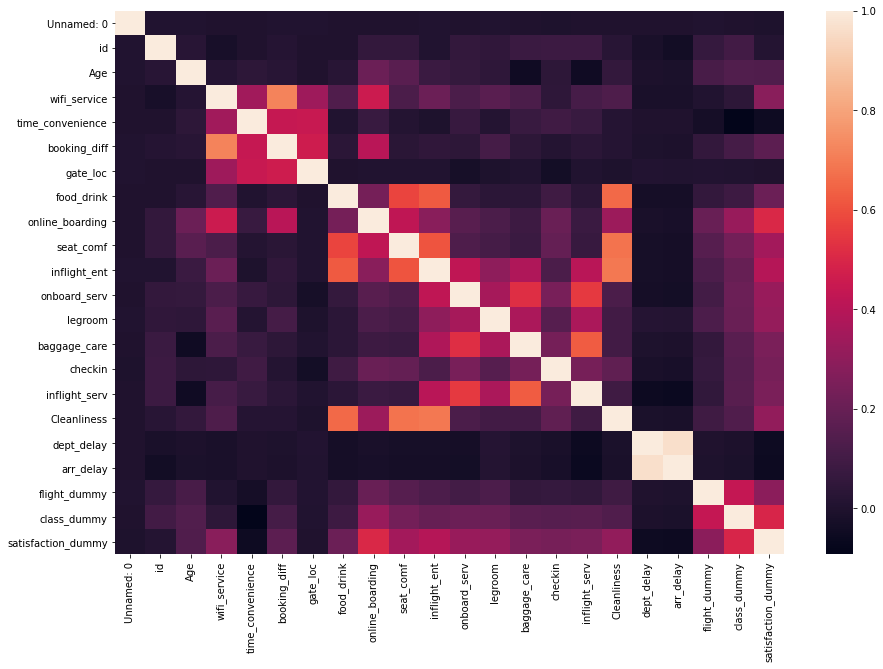

In [31]:
#training heatmap to view correlations between predictors. 
#dept_delay, and arr_delay are highly correlated as expected. There is also some correlation between predictors that describe the on-board experience of customers, like baggage_care and onboard_serv, food_drink and Cleanliness, which is also expected. 
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())


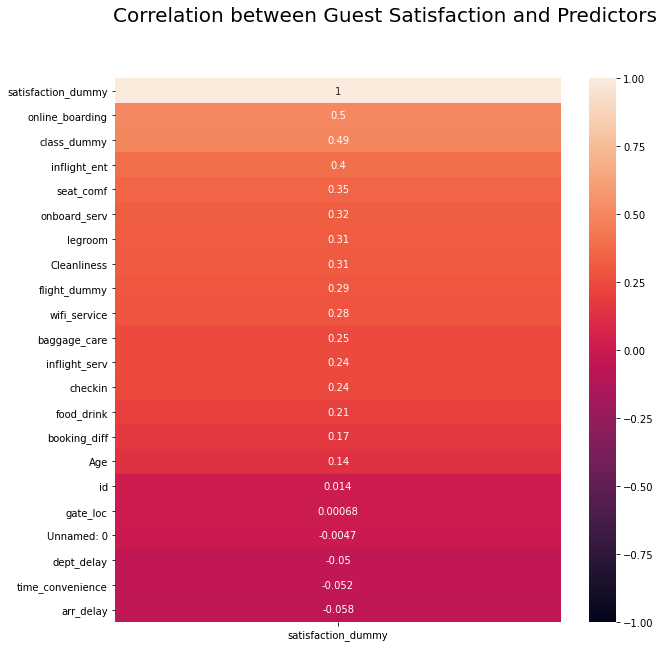

In [32]:
#Viewing correlatino between guest satisfaction and predictors.
#We see that the top 5 predictors that are most correlated with customer satisfaction are online_boarding, class, inflight_ent, seat_comf, and online_serv.
#The lest correlated predictors with customer satisfaction are arr_delay, time_convenience, dept_delay, Unnamed: 0, and gate_loc. This is observation is valid because customers are less satisfied when they are inconvienced with flight delays or flight times. 
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Correlation between Guest Satisfaction and Predictors',fontsize=20)
ax=sns.heatmap(df.corr()[['satisfaction_dummy']].sort_values("satisfaction_dummy"),vmax=1, vmin=-1, cmap="rocket", annot=True, ax=ax);
ax.invert_yaxis()

#### Distribution of highly correlated variables

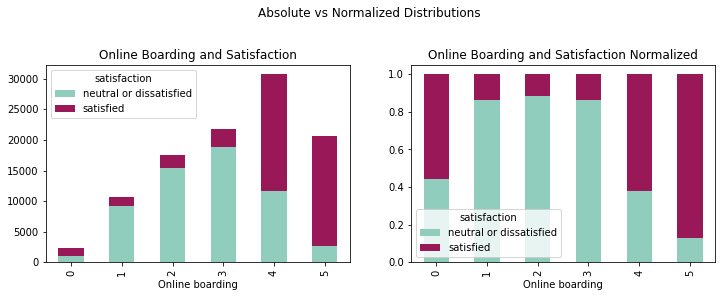

In [33]:
#plotting stacked and normalized stacked barplots of online boarding vs. satisfaction, using the original data without dummy variables
dfog = pd.read_csv('Desktop/train.csv')
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
fig.suptitle('Absolute vs Normalized Distributions')
ctonline = pd.crosstab(dfog['Online boarding'], dfog['satisfaction'])
ctonlinenorm = ctonline.div(ctonline.sum(1), axis=0)

plotonline = ctonline.plot(kind='bar', stacked = True, title = 'Online Boarding and Satisfaction',
                          ax = ax1, color = ['#90CDBC', '#991857'])

plotonlinenorm = ctonlinenorm.plot(kind='bar', stacked = True, title = 'Online Boarding and Satisfaction Normalized',
                                  ax = ax2, color = ['#90CDBC', '#991857'])

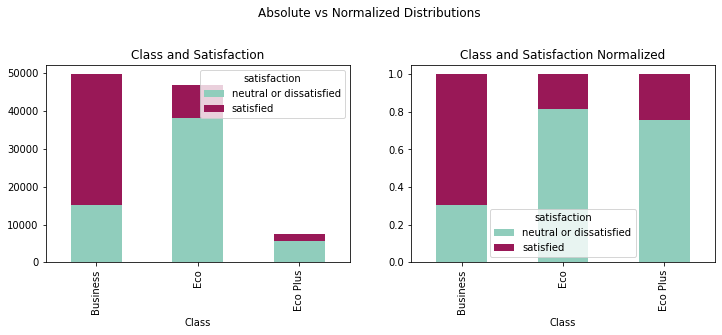

In [34]:
#plotting stacked and normalized stacked barplots class satisfaction
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
fig.suptitle('Absolute vs Normalized Distributions')
ctclass = pd.crosstab(dfog['Class'], dfog['satisfaction'])
ctclassnorm = ctclass.div(ctclass.sum(1), axis=0)

plotclass = ctclass.plot(kind='bar', stacked = True, title = 'Class and Satisfaction',
                          ax = ax1, color = ['#90CDBC', '#991857'])

plotclassnorm = ctclassnorm.plot(kind='bar', stacked = True, title = 'Class and Satisfaction Normalized',
                                  ax = ax2, color = ['#90CDBC', '#991857'])

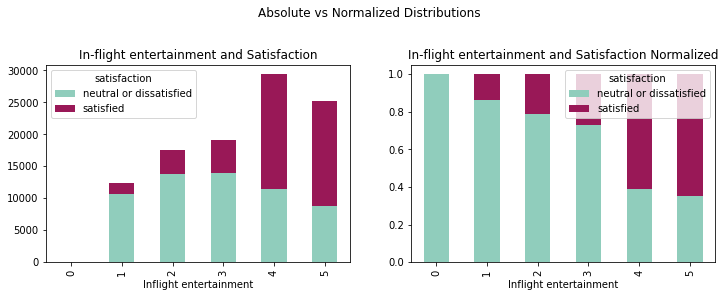

In [35]:
#plotting stacked and normalized stacked of in-flight entertainment and satisfaction
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
fig.suptitle('Absolute vs Normalized Distributions')
ctentertain = pd.crosstab(dfog['Inflight entertainment'], dfog['satisfaction'])
ctentertainnorm = ctentertain.div(ctentertain.sum(1), axis=0)

plotentertain = ctentertain.plot(kind='bar', stacked = True, title = 'In-flight entertainment and Satisfaction',
                          ax = ax1, color = ['#90CDBC', '#991857'])

plotentertainnorm = ctentertainnorm.plot(kind='bar', stacked = True, title = 'In-flight entertainment and Satisfaction Normalized',
                                  ax = ax2, color = ['#90CDBC', '#991857'])

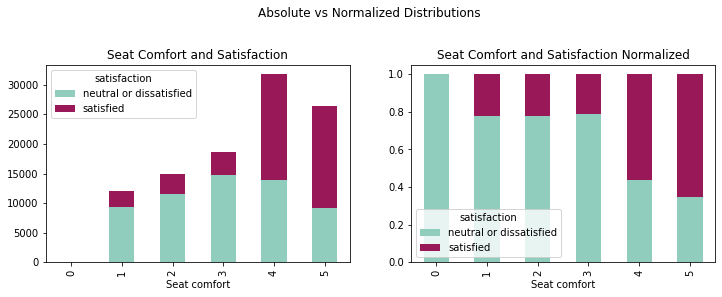

In [36]:
#plotting stacked and normalized stacked barplot of seat comfort and satisfaction
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
fig.suptitle('Absolute vs Normalized Distributions')
ctseat = pd.crosstab(dfog['Seat comfort'], dfog['satisfaction'])
ctseatnorm = ctseat.div(ctseat.sum(1), axis=0)

plotseat = ctseat.plot(kind='bar', stacked = True, title = 'Seat Comfort and Satisfaction',
                          ax = ax1, color = ['#90CDBC', '#991857'])

plotseatnorm = ctseatnorm.plot(kind='bar', stacked = True, title = 'Seat Comfort and Satisfaction Normalized',
                                  ax = ax2, color = ['#90CDBC', '#991857'])

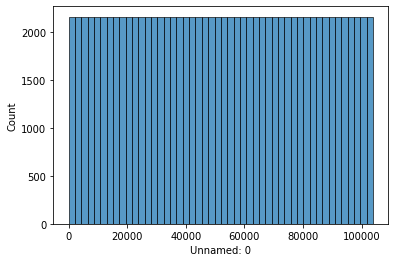

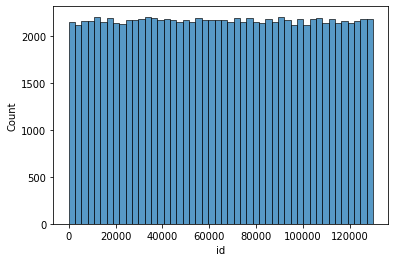

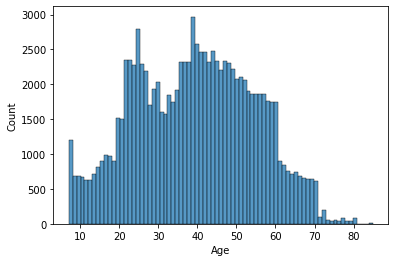

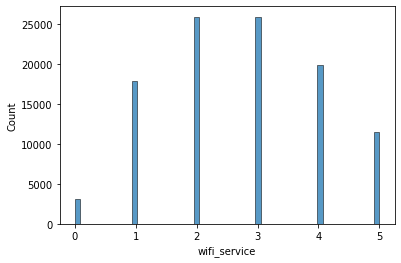

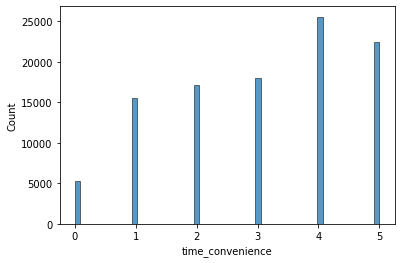

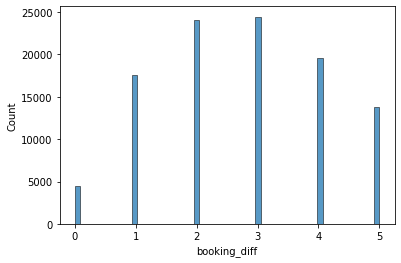

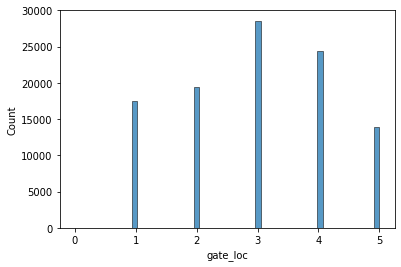

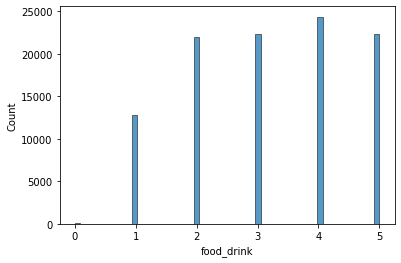

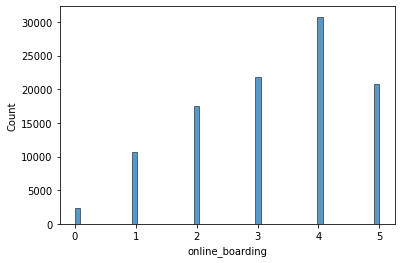

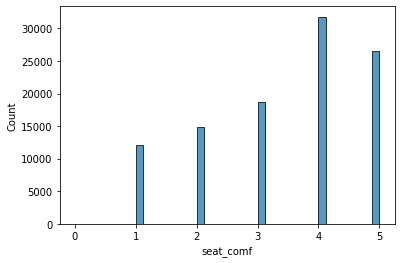

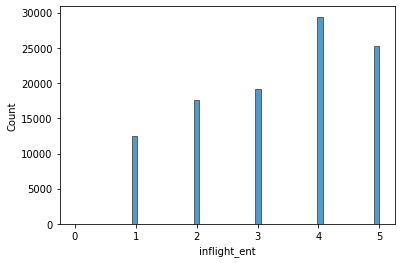

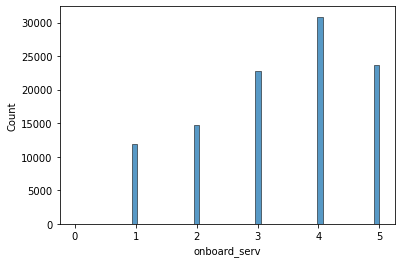

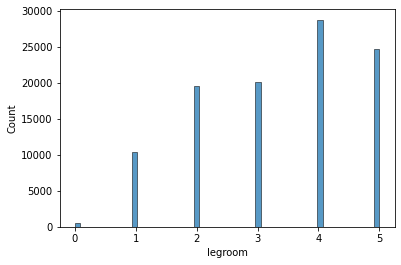

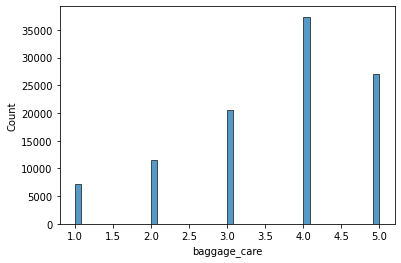

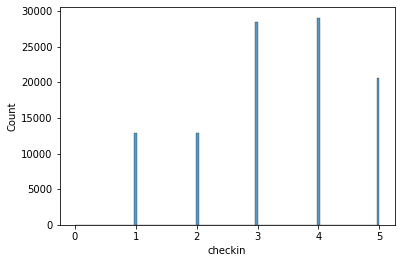

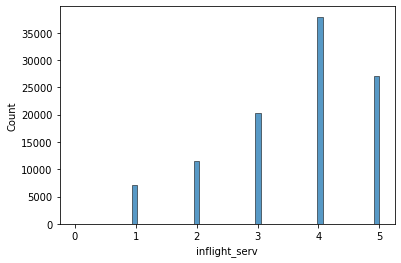

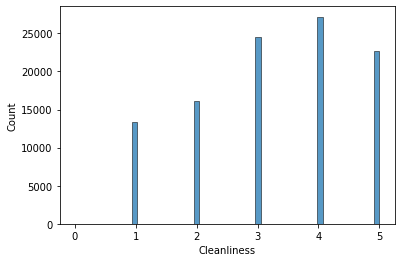

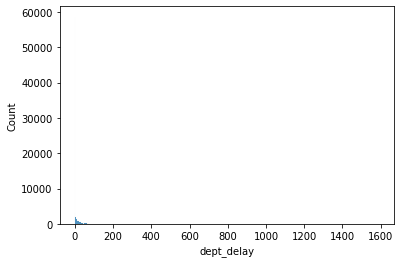

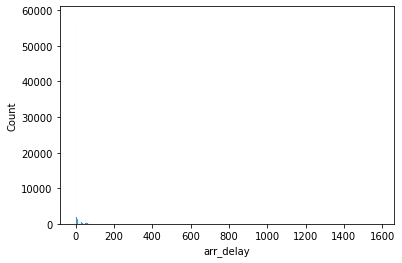

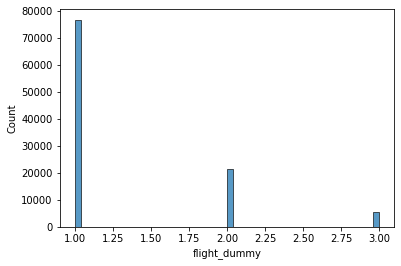

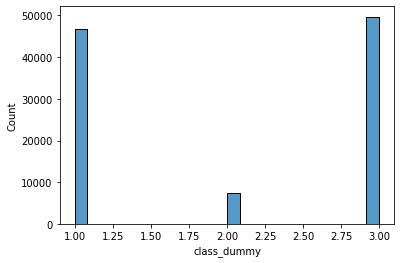

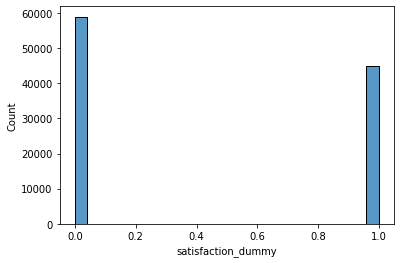

In [37]:
#plot distribution for all columns for training 
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.histplot(df[col])


<a id="splitting"></a>
<br>
### Data Splitting

In [38]:
#split data into predictors and outcome
predictors = ['Age', 'wifi_service','booking_diff', 'food_drink', 'online_boarding','seat_comf',
              'inflight_ent', 'onboard_serv', 'legroom', 'baggage_care', 'checkin', 'inflight_serv',
              'Cleanliness','flight_dummy', 'class_dummy']
outcome = ['satisfaction_dummy']

#split data into train/test
train_X = df[predictors]
train_y = df[outcome]
valid_X = dftest[predictors]
valid_y = dftest[outcome]

<a id="models"></a>
<br>
### Classification Models
#### The models that we will use here include: Logistic Regression, Decision Tree, Random Forest, K-Nearest Neighbors, Bagging, AdaBoost, and Neural Network.

#### _Logistic Regression Model_

In [39]:
#l2: uses Ridge regression, which adds squared magnitude of coefficient as a penalty term to the loss function
#cv = 5: to estimate the optimal parameters of the model
#solver = 'saga': peanties of elasticnet, l1, l2, and none
#max_iter = 110000: max iterations until solvers can converage
logit = LogisticRegressionCV(penalty='l2', solver='saga', cv=5, max_iter=110000, random_state=3).fit(train_X, train_y.values.ravel())

In [40]:
logit_confusion = confusionMatrices(logit, 'Logistic regression')

Logistic regression - training results
Confusion Matrix (Accuracy 0.8434)

            Prediction
     Actual   Satisfied Unsatisfied
  Satisfied       51747        7132
Unsatisfied        9140       35885
Logistic regression - validation results
Confusion Matrix (Accuracy 0.8381)

            Prediction
     Actual   Satisfied Unsatisfied
  Satisfied       12722        1851
Unsatisfied        2354        9049


The training accuracy is 84.34% while the testing accuracy is 83.81%, which is not a huge difference showing that the model was not overtrained.

#### _Decision Tree_

In [41]:
#Unprunned decision tree
dtree = DecisionTreeClassifier(random_state=3).fit(train_X, train_y)
tree_confusion = confusionMatrices(dtree, 'Decision Tree')

Decision Tree - training results
Confusion Matrix (Accuracy 0.9996)

            Prediction
     Actual   Satisfied Unsatisfied
  Satisfied       58878           1
Unsatisfied          43       44982
Decision Tree - validation results
Confusion Matrix (Accuracy 0.9265)

            Prediction
     Actual   Satisfied Unsatisfied
  Satisfied       13595         978
Unsatisfied         932       10471


The training accuracy is 99.96% and the test accuracy is 92.65%. 

#### _Bagging_

In [42]:
#Using the decision classification tree as the base estimator, bagging is used to improve metrics
bagging = BaggingClassifier(dtree, random_state=3, max_samples = 0.5, max_features = 0.5)
bagging.fit(train_X, train_y)
bag_confusion = confusionMatrices(bagging, 'Bagging')

Bagging - training results
Confusion Matrix (Accuracy 0.9552)

            Prediction
     Actual   Satisfied Unsatisfied
  Satisfied       57173        1706
Unsatisfied        2945       42080
Bagging - validation results
Confusion Matrix (Accuracy 0.9207)

            Prediction
     Actual   Satisfied Unsatisfied
  Satisfied       13725         848
Unsatisfied        1213       10190


Training accuracy is 95.52% and test accuracy is 92.07%. Decision trees with bagging did not help with improvement in the accuracy.

#### _Adaboost_

In [43]:
#Using the decision classification tree as the base estimator, adaboost is used to improve metrics
adaboost = AdaBoostClassifier(n_estimators = 100, base_estimator = dtree, random_state=3)
adaboost.fit(train_X, train_y)
ada_confusion = confusionMatrices(adaboost, 'Adaboost')

Adaboost - training results
Confusion Matrix (Accuracy 0.9996)

            Prediction
     Actual   Satisfied Unsatisfied
  Satisfied       58877           2
Unsatisfied          42       44983
Adaboost - validation results
Confusion Matrix (Accuracy 0.9423)

            Prediction
     Actual   Satisfied Unsatisfied
  Satisfied       13941         632
Unsatisfied         867       10536


Training accuracy is 99.96% and testing accuracy is 94.23%. Adaboost improved accuracy in the decision tree. 

#### _Random Forest_

In [44]:
rf = RandomForestClassifier(n_estimators=100, random_state=3).fit(train_X, train_y.values.ravel())

In [45]:
forest_confusion = confusionMatrices(rf, 'Random Forest')

Random Forest - training results
Confusion Matrix (Accuracy 0.9996)

            Prediction
     Actual   Satisfied Unsatisfied
  Satisfied       58861          18
Unsatisfied          26       44999
Random Forest - validation results
Confusion Matrix (Accuracy 0.9483)

            Prediction
     Actual   Satisfied Unsatisfied
  Satisfied       14076         497
Unsatisfied         846       10557


The training accuracy is 99.96% and 94.83%. Random forest performed better than decision tree classifier by 2%. 

#### _k-NN_

In [46]:
#finding optimal k value
results = []
values = [1, 3, 5, 7, 9, 11, 13, 15, 17]
for k in values:
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })
results = pd.DataFrame(results)
results

,k,accuracy
0,1,0.898945
1,3,0.908646
2,5,0.910956
3,7,0.910725
4,9,0.909147
5,11,0.909493
6,13,0.908300
7,15,0.909070
8,17,0.906375


In [47]:
#creating knn algorithm with n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors=5).fit(train_X, train_y)
knn_confusion = confusionMatrices(knn, 'k-NN Model')

k-NN Model - training results
Confusion Matrix (Accuracy 0.9360)

            Prediction
     Actual   Satisfied Unsatisfied
  Satisfied       56911        1968
Unsatisfied        4687       40338
k-NN Model - validation results
Confusion Matrix (Accuracy 0.9110)

            Prediction
     Actual   Satisfied Unsatisfied
  Satisfied       13843         730
Unsatisfied        1583        9820


The training accuracy is 93.60% and test accuracy is 91.10%. 

#### _Linear Discriminant Analysis_

In [48]:
ldaModel = LinearDiscriminantAnalysis()
ldaModel.fit(train_X, train_y)
ldaConfusion = confusionMatrices(ldaModel, 'Linear Discriminant Analysis')

Linear Discriminant Analysis - training results
Confusion Matrix (Accuracy 0.8387)

            Prediction
     Actual   Satisfied Unsatisfied
  Satisfied       51290        7589
Unsatisfied        9175       35850
Linear Discriminant Analysis - validation results
Confusion Matrix (Accuracy 0.8334)

            Prediction
     Actual   Satisfied Unsatisfied
  Satisfied       12600        1973
Unsatisfied        2354        9049


The training accuracy is 83.87% and the testing accuracy is 83.34%. 

#### _Neural Network_

In [49]:
#scaling training features to 1.0
scaleInput = MinMaxScaler()
scaleInput.fit(train_X * 1.0)

#hidden_layer_sizes = 10: number of neurons in the ith hidden layer
#activation: logistic sigmoid function
#solver: weight optimization using stocastic gradient descent
neuralNet = MLPClassifier(hidden_layer_sizes = (10),
                         activation = 'logistic',
                         solver = 'sgd',
                         max_iter = 3000,
                         random_state = 1)

neuralNet.fit(scaleInput.transform(train_X), train_y)
NNConfusion = confusionMatrices(neuralNet, 'Neural Network')

Neural Network - training results
Confusion Matrix (Accuracy 0.4926)

            Prediction
     Actual   Satisfied Unsatisfied
  Satisfied        7786       51093
Unsatisfied        1631       43394
Neural Network - validation results
Confusion Matrix (Accuracy 0.4983)

            Prediction
     Actual   Satisfied Unsatisfied
  Satisfied        1974       12599
Unsatisfied         432       10971


The neural network performs poorly on this data, with 49.26% accuracy on the training segment and 49.83% accuracy on the test segment.

<a id="results"></a>
<br>
### Results
#### Models are evaluated using the test data for accuracy, precision, recall, f1 score, area under ROC curve, and cumulative gains.

In [50]:
#Decision Tree
dtree_pred_test = dtree.predict(valid_X)
print('Accuracy score:')
print(accuracy_score(valid_y,dtree_pred_test))
dtree_roc = metrics.roc_curve(valid_y, dtree_pred_test)
dtree_auc = metrics.auc(dtree_roc[0], dtree_roc[1])
dtree_plot = metrics.RocCurveDisplay(dtree_roc[0], dtree_roc[1],
roc_auc=dtree_auc, estimator_name='Decision Tree')

Accuracy score:
0.9264705882352942


In [51]:
print(classification_report(valid_y, dtree_pred_test))

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93     14573
         1.0       0.91      0.92      0.92     11403

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



In [52]:
#Bagging
bagging_pred_test = bagging.predict(valid_X)
print(accuracy_score(valid_y,bagging_pred_test))
bagging_roc = metrics.roc_curve(valid_y, bagging_pred_test)
bagging_auc = metrics.auc(bagging_roc[0], bagging_roc[1])
bagging_plot = metrics.RocCurveDisplay(bagging_roc[0], bagging_roc[1],
roc_auc=bagging_auc, estimator_name='Bagging')

0.9206575300277179


In [53]:
print(classification_report(valid_y, bagging_pred_test))

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93     14573
         1.0       0.92      0.89      0.91     11403

    accuracy                           0.92     25976
   macro avg       0.92      0.92      0.92     25976
weighted avg       0.92      0.92      0.92     25976



In [54]:
#Adaboost
adaboost_pred_test = adaboost.predict(valid_X)
print(accuracy_score(valid_y,adaboost_pred_test))
adaboost_roc = metrics.roc_curve(valid_y, adaboost_pred_test)
adaboost_auc = metrics.auc(adaboost_roc[0], adaboost_roc[1])
adaboost_plot = metrics.RocCurveDisplay(adaboost_roc[0], adaboost_roc[1],
roc_auc=adaboost_auc, estimator_name='Adaboost')

0.9422928857406837


In [55]:
print(classification_report(valid_y, adaboost_pred_test))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95     14573
         1.0       0.94      0.92      0.93     11403

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



In [56]:
#Logistic Regression
logit_pred_test = logit.predict(valid_X)
print(accuracy_score(valid_y,logit_pred_test))
logit_roc = metrics.roc_curve(valid_y, logit_pred_test)
logit_auc = metrics.auc(logit_roc[0], logit_roc[1])
logit_plot = metrics.RocCurveDisplay(logit_roc[0], logit_roc[1],
roc_auc=logit_auc, estimator_name='Logistic Regression')

0.83811980289498


In [57]:
print(classification_report(valid_y, logit_pred_test))

              precision    recall  f1-score   support

         0.0       0.84      0.87      0.86     14573
         1.0       0.83      0.79      0.81     11403

    accuracy                           0.84     25976
   macro avg       0.84      0.83      0.83     25976
weighted avg       0.84      0.84      0.84     25976



In [58]:
#Random Forest
rf_pred_test = rf.predict(valid_X)
print(accuracy_score(valid_y,rf_pred_test))
rf_roc = metrics.roc_curve(valid_y, rf_pred_test)
rf_auc = metrics.auc(rf_roc[0], rf_roc[1])
rf_plot = metrics.RocCurveDisplay(rf_roc[0], logit_roc[1],
roc_auc=rf_auc, estimator_name='Random Forest')

0.9482984293193717


In [59]:
print(classification_report(valid_y, rf_pred_test))

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95     14573
         1.0       0.96      0.93      0.94     11403

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



In [60]:
#k-NN
knn_pred_test = knn.predict(valid_X)
print(accuracy_score(valid_y,knn_pred_test))
knn_roc = metrics.roc_curve(valid_y, knn_pred_test)
knn_auc = metrics.auc(knn_roc[0], knn_roc[1])
knn_plot = metrics.RocCurveDisplay(knn_roc[0], knn_roc[1],
roc_auc=knn_auc, estimator_name='k-Nearest Neighbors')

0.9109562673236834


In [61]:
print(classification_report(valid_y, knn_pred_test))

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92     14573
         1.0       0.93      0.86      0.89     11403

    accuracy                           0.91     25976
   macro avg       0.91      0.91      0.91     25976
weighted avg       0.91      0.91      0.91     25976



In [62]:
#Linear Discriminant Analysis
ldaModel_pred_test = ldaModel.predict(valid_X)
print(accuracy_score(valid_y,ldaModel_pred_test))
ldaModel_roc = metrics.roc_curve(valid_y, ldaModel_pred_test)
ldaModel_auc = metrics.auc(ldaModel_roc[0], ldaModel_roc[1])
ldaModel_plot = metrics.RocCurveDisplay(ldaModel_roc[0], ldaModel_roc[1],
roc_auc=ldaModel_auc, estimator_name='Linear Discriminant Analysis')

0.8334231598398522


In [63]:
print(classification_report(valid_y, ldaModel_pred_test))

              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85     14573
         1.0       0.82      0.79      0.81     11403

    accuracy                           0.83     25976
   macro avg       0.83      0.83      0.83     25976
weighted avg       0.83      0.83      0.83     25976



In [64]:
#Neural Network
neuralNet_pred_test = neuralNet.predict(valid_X)
print(accuracy_score(valid_y,neuralNet_pred_test))
neuralNet_roc = metrics.roc_curve(valid_y, neuralNet_pred_test)
neuralNet_auc = metrics.auc(ldaModel_roc[0], neuralNet_roc[1])
neuralNet_plot = metrics.RocCurveDisplay(neuralNet_roc[0], neuralNet_roc[1],
roc_auc=neuralNet_auc, estimator_name='Artificial Neural Network')

0.4983446258084386


In [65]:
print(classification_report(valid_y, neuralNet_pred_test))

              precision    recall  f1-score   support

         0.0       0.82      0.14      0.23     14573
         1.0       0.47      0.96      0.63     11403

    accuracy                           0.50     25976
   macro avg       0.64      0.55      0.43     25976
weighted avg       0.66      0.50      0.41     25976



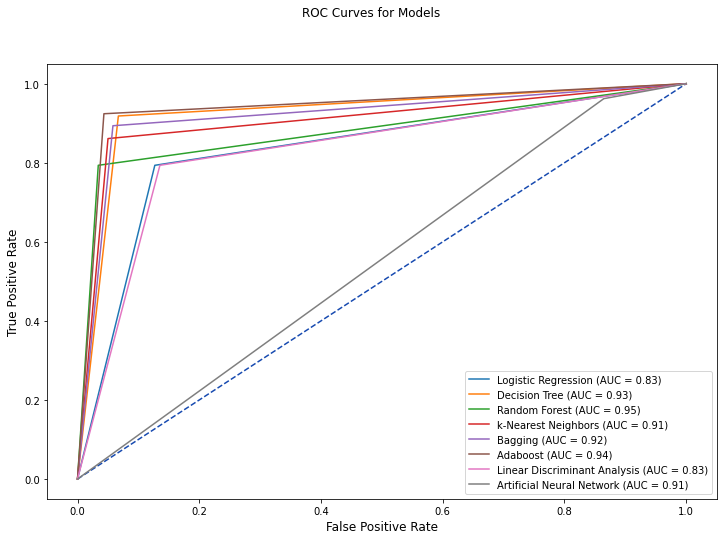

In [66]:
# Plotting ROC Curves for models
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle('ROC Curves for Models', fontsize=12)
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.xlabel('',fontsize=12)
plt.ylabel('',fontsize=12)

logit_plot.plot(ax)
dtree_plot.plot(ax)
rf_plot.plot(ax)
knn_plot.plot(ax)
bagging_plot.plot(ax)
adaboost_plot.plot(ax)
ldaModel_plot.plot(ax)
neuralNet_plot.plot(ax)
plt.show()

The Random Forest model has the highest AUC, followed closely by Adaboost, which has strong performance when predicting true positives vs. false positives.

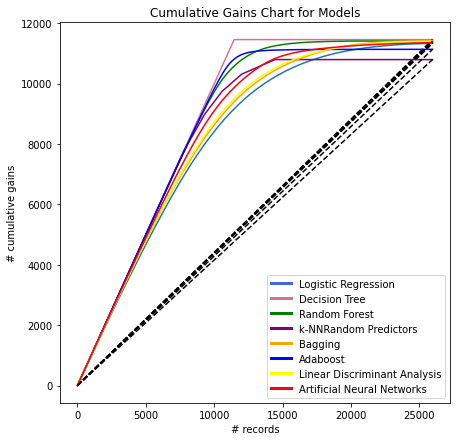

In [67]:
from dmba import liftChart
logisticchart = pd.Series(logit.predict_proba(valid_X)[:, 1])
logisticchart = logisticchart.sort_values(ascending=False)
dtreechart = pd.Series(dtree.predict_proba(valid_X)[:, 1])
dtreechart = dtreechart.sort_values(ascending=False)
rfchart = pd.Series(rf.predict_proba(valid_X)[:, 1])
rfchart = rfchart.sort_values(ascending=False)
knnchart = pd.Series(knn.predict_proba(valid_X)[:, 1])
knnchart = knnchart.sort_values(ascending=False)
baggingchart = pd.Series(bagging.predict_proba(valid_X)[:, 1])
baggingchart = baggingchart.sort_values(ascending=False)
adaboostchart = pd.Series(adaboost.predict_proba(valid_X)[:, 1])
adaboostchart = adaboostchart.sort_values(ascending=False)
ldaModelchart = pd.Series(ldaModel.predict_proba(valid_X)[:, 1])
ldaModelchart = ldaModelchart.sort_values(ascending=False)
neuralNetchart = pd.Series(neuralNet.predict_proba(scaleInput.transform(valid_X))[:, 1])
neuralNetchart = neuralNetchart.sort_values(ascending=False)


ax= gainsChart(logisticchart, figsize=[7,7])
gainsChart(dtreechart, color='palevioletred', ax=ax)
gainsChart(rfchart, color='green', ax=ax)
gainsChart(knnchart, color='purple', ax=ax)
gainsChart(baggingchart, color='orange', ax=ax)
gainsChart(adaboostchart, color='blue', ax=ax)
gainsChart(ldaModelchart, color='yellow', ax=ax)
gainsChart(neuralNetchart, color='red', ax=ax)

ax.set_title('Cumulative Gains Chart for Models')
colors = ['royalblue', 'palevioletred', 'green', 'purple', 'orange', 'blue', 'yellow', 'red']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels=['Logistic Regression', 'Decision Tree', 'Random Forest', 'k-NN'
        'Random Predictors', 'Bagging', 'Adaboost', 'Linear Discriminant Analysis', 'Artificial Neural Networks']
plt.legend(lines, labels)

The Decision Tree, Random Forest, and Adaboost models have the strongest performance when examining cumulative gains.

<a id="conclusion"></a>
<br>
### Conclusion

In [68]:
# Table of metrics
metrics = [['Decision Tree', 0.926, 0.93], ['Bagging', 0.921, 0.92], ['Adaboost', 0.942, 0.94],
          ['Logistic Regression', 0.838, 0.83], ['Random Forest', 0.948, 0.95], ['k-NN', 0.911, 0.91],
          ['LDA', 0.833, 0.83], ['Neural Network', 0.498, 0.84]]
metricdf = pd.DataFrame(metrics, columns = ['Model', 'Accuracy', 'AUC'])
metricdf

,Model,Accuracy,AUC
0,Decision Tree,0.926,0.93
1,Bagging,0.921,0.92
2,Adaboost,0.942,0.94
3,Logistic Regression,0.838,0.83
4,Random Forest,0.948,0.95
5,k-NN,0.911,0.91
6,LDA,0.833,0.83
7,Neural Network,0.498,0.84


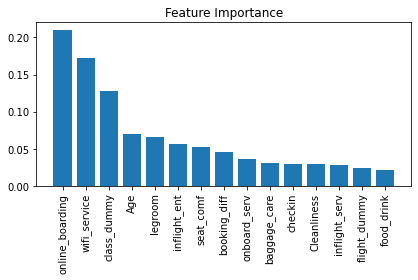

In [81]:
# Plotting importance by feature
sorted_indices = np.argsort(importance)[::-1]
plt.title('Feature Importance')
plt.bar(range(train_X.shape[1]), importance[sorted_indices], align='center')
plt.xticks(range(train_X.shape[1]), train_X.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

Using the random forest model, prediciting whether a customer is satisfied or unsatisfied can be accomplished with high levels of accuracy, with the test data at 94.8% accuracy, the highest area under the ROC curve, and strong performance in cumulative gains. Using the random forest model, the most influencial features in determining if someone has a satisfactory experience is the quality of online boarding, the wifi service, what class they are in, their age, and the amount of legroom. Inflight entertainment and seat comfort are also important features, and are additional features airlines have a level of control over.